In [20]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Load Dataset

In [8]:
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


# Exploratory Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.5+ KB


In [6]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


#### There is an outlier (704000) in column 'order_amount' from the summary statistics shown above. This drives the average value of order amount to an abnormal value 3145, which is greater than 75% of order amount. 
#### Let's zoom in to the tail of the distribution of order amount to see how extreme the value could be

In [16]:
# Get the value of order amount at different quantitle.  
for i in [25,50,75,90, 95,97,99]:
    percentile = np.quantile(data.order_amount, i/100.0)
    print (f'{i}% percentile of order amount is: {percentile}')

25% percentile of order amount is: 163.0
50% percentile of order amount is: 284.0
75% percentile of order amount is: 390.0
90% percentile of order amount is: 531.0
95% percentile of order amount is: 640.0
97% percentile of order amount is: 712.0
99% percentile of order amount is: 25725.0


#### 97% of order amount is < 800 from the percentiles shown above. Let's check the distributon of order amount after removing outliers.

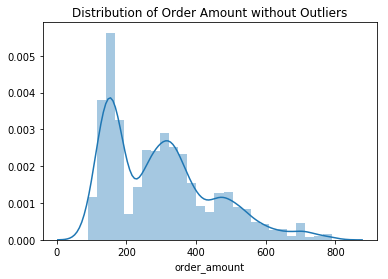

In [37]:
data2 = data[data['order_amount']<800] #remove outliers
sns.distplot(data2.order_amount)
plt.title("Distribution of Order Amount without Outliers")
plt.show()

#### The distribution above looks like a mixed gaussian with 3 components. 
#### Let's check if there is any user buying more or any shop selling more.

In [38]:
amount_by_user = data2.groupby('user_id')['order_amount'].describe().reset_index() # group by user 


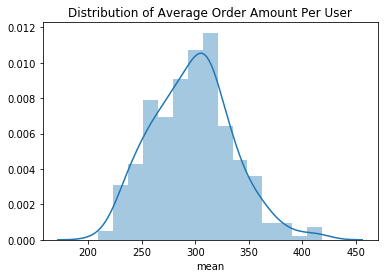

In [36]:
sns.distplot(amount_by_user['mean'])
plt.title("Distribution of Average Order Amount Per User")
plt.show()

#### The average order amount per user is bell shaped around 300.  No extreme value is shown in the plot 

In [39]:
amount_by_shop = data2.groupby('shop_id')['order_amount'].describe().reset_index() # group by shop


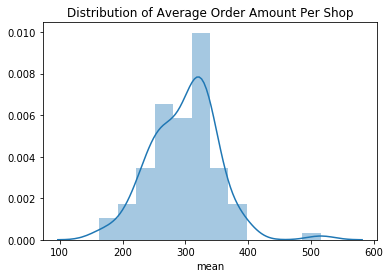

In [35]:
sns.distplot(amount_by_shop['mean'])
plt.title("Distribution of Average Order Amount Per Shop")
plt.show()

In [41]:
amount_by_shop[amount_by_shop['mean']>=500]['shop_id'].unique()

array([42])

#### There is one shop with order amount obviously higher than others. This shop has ID 42. 